<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Sai Bhargav Tetali

EID: srt2578

Name: Snehal Naravane

EID: sn27429

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

# Answer:

#### <b>The main advantages and disadvantages of CatBoost as compared to XGBoost are:</b><br>
<br>

#### <b>Categorical Features:</b><br>
* CatBoost has the flexibility of giving indices of categorical columns so that it can be encoded as one-hot encoding using one_hot_max_size (Use one-hot encoding for all features with number of different values less than or equal to the given parameter value).
If nothing is passed in the cat_features argument, CatBoost will treat all the columns as numerical variables.
For remaining categorical columns which have unique number of categories greater than one_hot_max_size, CatBoost uses an efficient method of encoding which is similar to mean encoding but reduces overfitting.
CatBoost performs well only when we have categorical variables in the data and we properly tune them.
* Unlike CatBoost, XGBoost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest. Therefore one has to perform various encodings like label encoding, mean encoding or one-hot encoding before supplying categorical data to XGBoost.
<br>

#### <b>Accuracy:</b><br>
* CatBoost is more accurate than XGBoost.
* XGBoost which generally works well. It’s accuracy is quite close to CatBoost.
<br>

#### <b>Suppport for Unstructrured Data and Naive Bayes:</b><br>
* CatBoost supports text columns, bag of words, and Naive Bayes.<br>
* XGBoost does not support text columns, bag of words, and Naive Bayes.
<br>

#### <b>Technique:</b><br>
* Catboost offers a new technique called Minimal Variance Sampling (MVS), which is a weighted sampling version of Stochastic Gradient Boosting. In this technique, the weighted sampling happens in the tree-level and not in the split-level. The observations for each boosting tree are sampled in a way that maximizes the accuracy of split scoring.
* XGboost is not using any weighted sampling techniques, which makes its splitting process slower compared to GOSS and MVS.
<br>

#### <b>Performance:</b><br>
* CatBoost performs much faster than XGBoost, especially for larger datasets.
* The only problem with XGBoost is that it is too slow. It can be very difficult and time consuming to tune its parameters.
<br>

#### <b>Tree Symmetry:</b><br>
* In CatBoost, symmetric trees, or balanced trees, refer to the splitting condition being consistent across all nodes at the same depth of the tree.
* XGBoost, on the other hand, results in asymmetric trees, meaning splitting condition for each node across the same depth can differ.

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [1]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [2]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline

In [4]:
columns_list = list(X.columns)

In [5]:
# Part a)
clf_dt = DecisionTreeClassifier(random_state = 14)
clf_dt_fit = clf_dt.fit(X_train,y_train)
y_prediction_dt = clf_dt_fit.predict(X_test)
y_prob_dt = clf_dt_fit.predict_proba(X_test)[:,1]
print('Decision Tree Classifier: ')
print('Accuracy Score: ',accuracy_score(y_test, y_prediction_dt))
print('AUC Score: ', roc_auc_score(y_test, y_prob_dt))

Decision Tree Classifier: 
Accuracy Score:  0.888
AUC Score:  0.5854582176218127


In [6]:
# Part b)
clf_bag = BaggingClassifier(clf_dt, n_estimators = 25, random_state = 14)
clf_bag_fit = clf_bag.fit(X_train, y_train)
y_prediction_bag = clf_bag_fit.predict(X_test)
y_prob_bag = clf_bag_fit.predict_proba(X_test)[:,1]
print('Bagging Classifier:')
print('Accuracy Score: ',accuracy_score(y_test,y_prediction_bag))
print('AUC Score: ',roc_auc_score(y_test,y_prob_bag))

Bagging Classifier:
Accuracy Score:  0.9256
AUC Score:  0.7857106791214341


In [7]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV = clf_rfGCV.fit(X_train, y_train)
print(clf_rfGCV.best_params_)

/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/saibhargavtetali/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}


In [35]:
y_prediction_rf = clf_rfGCV.predict(X_test)
y_prob_rf = clf_rfGCV.best_estimator_.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_prediction_rf))
print('Accuracy Score: ',accuracy_score(y_test,y_prediction_rf))
print('AUC Score: ',roc_auc_score(y_test,y_prob_rf))

Random Forest Classifier:
Confusion Matrix: 
[[1162    3]
 [  82    3]]
Accuracy Score:  0.932
AUC Score:  0.8375612219136582


In [9]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_ABCGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_ABCGCV = clf_ABCGCV.fit(X_train, y_train)
print(clf_ABCGCV.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}


In [10]:
y_prediction_ABC = clf_ABCGCV.predict(X_test)
y_prob_ABC = clf_ABCGCV.best_estimator_.predict_proba(X_test)[:,1]
print('AdaBoost Classifier:')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_prediction_ABC))
print('Accuracy Score: ',accuracy_score(y_test,y_prediction_ABC))
print('AUC Score: ',roc_auc_score(y_test,y_prob_ABC))

AdaBoost Classifier:
Confusion Matrix: 
[[1153   12]
 [  72   13]]
Accuracy Score:  0.9328
AUC Score:  0.8390254986114618


In [11]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search
clf_GBCGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_GBCGCV = clf_GBCGCV.fit(X_train, y_train)
print(clf_GBCGCV.best_params_)

{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}


In [12]:
y_prediction_GBC = clf_GBCGCV.predict(X_test)
y_prob_GBC = clf_GBCGCV.best_estimator_.predict_proba(X_test)[:,1]
print('Gradient Boosting Classifier:')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_prediction_GBC))
print('Accuracy Score: ',accuracy_score(y_test,y_prediction_GBC))
print('AUC Score: ',roc_auc_score(y_test,y_prob_GBC))

Gradient Boosting Classifier:
Confusion Matrix: 
[[1164    1]
 [  84    1]]
Accuracy Score:  0.932
AUC Score:  0.8366372128250441


# Part f
Compared to the Decision tree classifier, the ensemble methods performed better. The following are the Accuracy and AUC-ROC scores achieved by each of the classifiers on the test dataset:

|Classier Model | Accuracy Score | AUC-ROC |        
| ----- | ----- | ----- |
| Decision Tree | 0.8880 | 0.5855 |
| Bagging | 0.9256 | 0.7857 |
| Random Forest | 0.9320 | 0.8376 |
| AdaBoost | 0.9328 | 0.8390 |
| Gradient Boosting | 0.9320 | 0.8366 |

Out of the Ensemble methods, AdaBoost classifier performed the best. AdaBoost tries to focus on the misclassified datapoints. For each iteration, the misclassified datapoints are given higher weightage and decision boundary is created in such a way that most of the previously misclassified data points are now correctly classified. In this way in each iteration misclassified data is prioritized and at the end, all the iterations are given a weight (the latest iteration has the highest weightage) and combined. Since AdaBoost algorithm focuses solely on misclassification errors it performs marginally better. Also, AdaBoost works only for Binary classification.

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [3]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.495 s
predict time 0.004 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.462 s
predict time 0.004 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.465 s
predict time 0.004 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



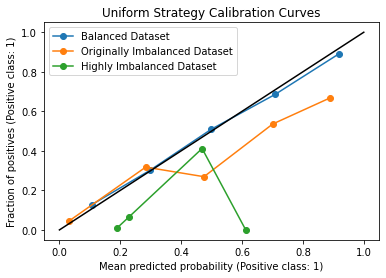

In [8]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
xgboost_by, xgboost_bx = calibration_curve(y_test1, y_pred_proba1)
xgboost_iby, xgboost_ibx = calibration_curve(y_test2, y_pred_proba2)
xgboost_hiby, xgboost_hibx = calibration_curve(y_test3, y_pred_proba3)


plt.plot(xgboost_bx, xgboost_by, marker = 'o')
plt.plot(xgboost_ibx, xgboost_iby, marker = 'o')
plt.plot(xgboost_hibx, xgboost_hiby, marker = 'o')
plt.plot([0,1], [0,1], color = 'black')
plt.legend(['Balanced Dataset', 'Originally Imbalanced Dataset', 'Highly Imbalanced Dataset'])
plt.title('Uniform Strategy Calibration Curves')
plt.xlabel('Mean predicted probability (Positive class: 1)')
plt.ylabel('Fraction of positives (Positive class: 1)')
plt.show()

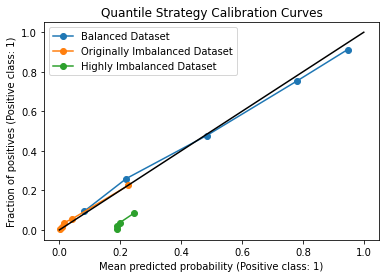

In [9]:
#Plot all calibration curves for strategy = 'quantile'
xgboost_by_1, xgboost_bx_1 = calibration_curve(y_test1, y_pred_proba1, strategy = 'quantile')
xgboost_iby_1, xgboost_ibx_1 = calibration_curve(y_test2, y_pred_proba2, strategy = 'quantile')
xgboost_hiby_1, xgboost_hibx_1 = calibration_curve(y_test3, y_pred_proba3, strategy = 'quantile')


plt.plot(xgboost_bx_1, xgboost_by_1, marker = 'o')
plt.plot(xgboost_ibx_1, xgboost_iby_1, marker = 'o')
plt.plot(xgboost_hibx_1, xgboost_hiby_1, marker = 'o')
plt.plot([0,1], [0,1], color = 'black')
plt.legend(['Balanced Dataset', 'Originally Imbalanced Dataset', 'Highly Imbalanced Dataset'])
plt.title('Quantile Strategy Calibration Curves')
plt.xlabel('Mean predicted probability (Positive class: 1)')
plt.ylabel('Fraction of positives (Positive class: 1)')
plt.show()

The Balanced dataset has the best calibrated model. The Quantile Strategy Calibration Curves give more informative visualization as the bins are created based on the values of probability value of each of the data points. In this way, we can segregate the high probability data points and low probability data points and visualize the performance of the model. This is useful when we have unbalanced datasets.

# Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning:

## a) **[2.5 pts]** Skip connections

## Answer:

In a multi layer neural network, skip connections are used to skip some of the layers. In that process, the output of one layer is given to the next layers as the input (instead of only the next one). By using a skip connection, an alternative path is provided for the gradient (with backpropagation).

With back propogation, as the earlier layers are approached in a deep architecture, the gradient becomes very small, even becoming zero in some cases, i.e. the early layers do not get updated at all.

When developing deep neural nets, the model's performance degrades as the architecture's load increases, which is referred to as the degradation problem. The major reasons for the degradation problem are overfitting or the depth of the model in general, because a model with more layers has more training errors compared to the shallower models. Skip connections can help solve degradation problems.

In general, there are two fundamental ways that one could use skip connections through different non-sequential layers:<br>
(a) addition as in residual architectures,<br>
(b) concatenation as in densely connected architectures.

## b) **[2.5 pts]** Batch normalization

## Answer:

Regularization is a way to avoid overfitting of the model. Regularization techniques help to improve a model and allows it to converge faster.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Batch normalization is used as a technique to help coordinate the update of multiple layers in the model.

It does this by scaling the output of the layer, specifically by standardizing the activations of each input variable per mini-batch, such as the activations of a node from the previous layer. i.e. rescaling data to have a mean of zero and a standard deviation of one, like a standard Gaussian.

Normalizing the inputs to the layer has an effect on the training of the model, dramatically reducing the number of epochs required. It can also have a regularizing effect, reducing generalization error much like the use of activation regularization.


Batch-Normalization is an algorithmic method which makes the training of Deep Neural Networks (DNN) faster and more stable.

It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch. This normalization step is applied right before (or right after) the nonlinear function.